In [6]:
import numpy as np
import pandas as pd

In [9]:
df=pd.read_csv('/content/salary_data.csv')
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [10]:
X= df.iloc[:,0]
y=df.iloc[:,1]

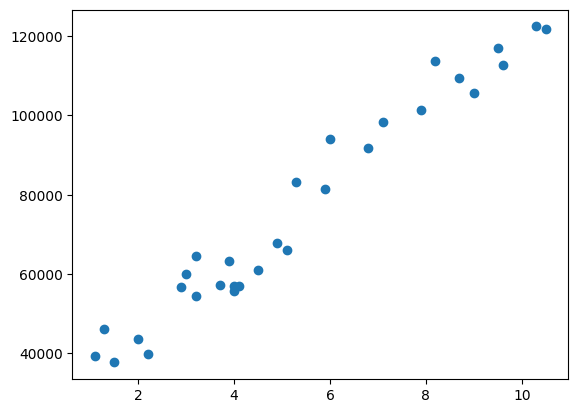

In [11]:
import matplotlib.pyplot as plt
plt.scatter(X,y)

In [1]:
def model (X,A1,A2,B):
  return A1*X+A2*(X**2)+B

In [2]:
def mse(y, y_hat):
  return 1/(2*len(y)) * np.sum((y_hat - y)**2)

In [13]:
def gd(A1, A2, B, X, y, lr=0.01):
    y_hat = model(X, A1, A2, B)
    error = y_hat - y
    dA1 = np.dot(error.T, X) / len(y)
    dA2 = np.dot(error.T, X ** 2) / len(y)
    dB = np.sum(error) / len(y)

    A1 -= lr * dA1
    A2 -= lr * dA2
    B -= lr * dB

    return A1, A2, B


In [14]:
def epoch(X, y, A1, A2, B, lr):
    A1, A2, B = gd(A1, A2, B, X, y, lr)
    loss = mse(y, model(X, A1, A2, B))
    return A1, A2, B, loss


<ipython-input-2-abff2494bea2>:2: RuntimeWarning: overflow encountered in square
  return 1/(2*len(y)) * np.sum((y_hat - y)**2)
<ipython-input-13-6a94eea66efa>:9: RuntimeWarning: invalid value encountered in subtract
  A2 -= lr * dA2


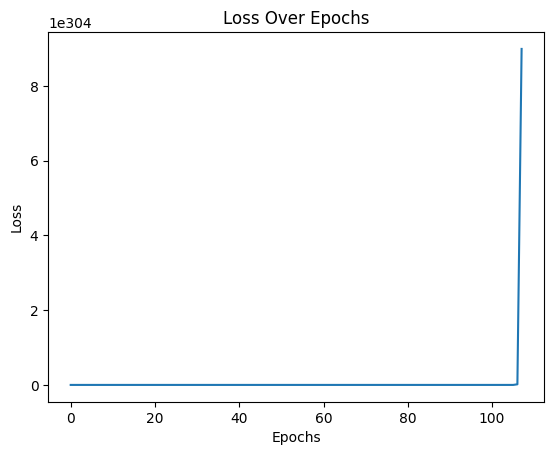

In [16]:
A1 = np.random.randn(1, 1)
A2 = np.random.randn(1, 1)
B = np.random.randn(1, 1)
lr = 0.01
epochs = 1000
losses = []

for i in range(epochs):
    A1, A2, B, loss = epoch(X, y, A1, A2, B, lr)
    losses.append(loss)

plt.plot(np.arange(epochs), losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Over Epochs')
plt.show()
